# Amazon Business Research Analyst Hiring Challenge: Round 1



In [103]:
#Importing libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [104]:
X = pd.read_csv("train.csv", index_col="EmpID")
X_test_full = pd.read_csv("test.csv", index_col="EmpID")

In [105]:
X

,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
EmpID,,,,,,,,,,,,,,,,,,,,,
11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19504,Perley,English,25,Female,JR87525,Dual MBA,Electrical,Tier 2,7,2,...,30,34,Married,3,SDE,Startup,Engineering,5,Gender,93.65
17071,Randall,Native,29,Other,JR87525,Dual M.Tech,Computer Science,Tier 1,7,6,...,22,28,Married,4,SSE,Startup,Customer Success,14,NaN,52.90
6659,Raphael,Hindi,37,Male,JR88873,M.Tech,Artificial Intelligence,Tier 1,8,11,...,8,16,Single,4,SDE,Enterprise,Design,20,CurrentCompanyType,61.46


In [106]:
X_test_full

,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
EmpID,,,,,,,,,,,,,,,,,,,
5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18
23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8
21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18
8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17
6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14758,Matt,English,26,Female,JR85289,B.Tech,Computer Science,Tier 1,10,3,2018,29,38,Married,5,SDE,Startup,Design,10
23544,Salvatore,Hindi,27,Male,JR85289,MS,Electrical,Tier 1,10,1,2020,18,26,Married,4,BA,Startup,Design,19
16175,Adrian,English,27,Male,JR85289,B.Tech,Computer Science,Tier 2,7,4,2017,7,17,Married,4,SDE,Startup,Engineering,12


In [107]:
#Data Cleansing

print(X.isnull().sum())
print('  ****************************  ')
print(X_test_full.isnull().sum())

EmpName                       0
LanguageOfCommunication       0
Age                           0
Gender                        0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
GraduationYear                0
CurrentCTC                    0
ExpectedCTC                   0
MartialStatus                 0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      3336
FitmentPercent                0
dtype: int64
  ****************************  
EmpName                    0
LanguageOfCommunication    0
Age                        0
Gender                     0
JobProfileIDApplyingFor    0
HighestDegree              0
DegreeBranch               0
GraduatingInstitute        0
LatestDegreeCGPA           0
YearsOfExperince     

In [108]:
#Checking the unique values in train and test data.

print(X.nunique())
print('  ****************************  ')
print(X_test_full.nunique())

EmpName                    1766
LanguageOfCommunication       3
Age                          19
Gender                        3
JobProfileIDApplyingFor       9
HighestDegree                 8
DegreeBranch                  6
GraduatingInstitute           3
LatestDegreeCGPA              7
YearsOfExperince             12
GraduationYear               12
CurrentCTC                   25
ExpectedCTC                  31
MartialStatus                 2
EmpScore                      5
CurrentDesignation            8
CurrentCompanyType            3
DepartmentInCompany           5
TotalLeavesTaken             17
BiasInfluentialFactor         9
FitmentPercent             4578
dtype: int64
  ****************************  
EmpName                    1566
LanguageOfCommunication       3
Age                          19
Gender                        3
JobProfileIDApplyingFor       9
HighestDegree                 8
DegreeBranch                  6
GraduatingInstitute           3
LatestDegreeCGPA          

In [109]:
# Treating the missing values
# ** I decided to drop the rows of missing data as there was only one colunmn with missing data and that tends to be the dependednt variable.

X.dropna(axis = 0, inplace = True)

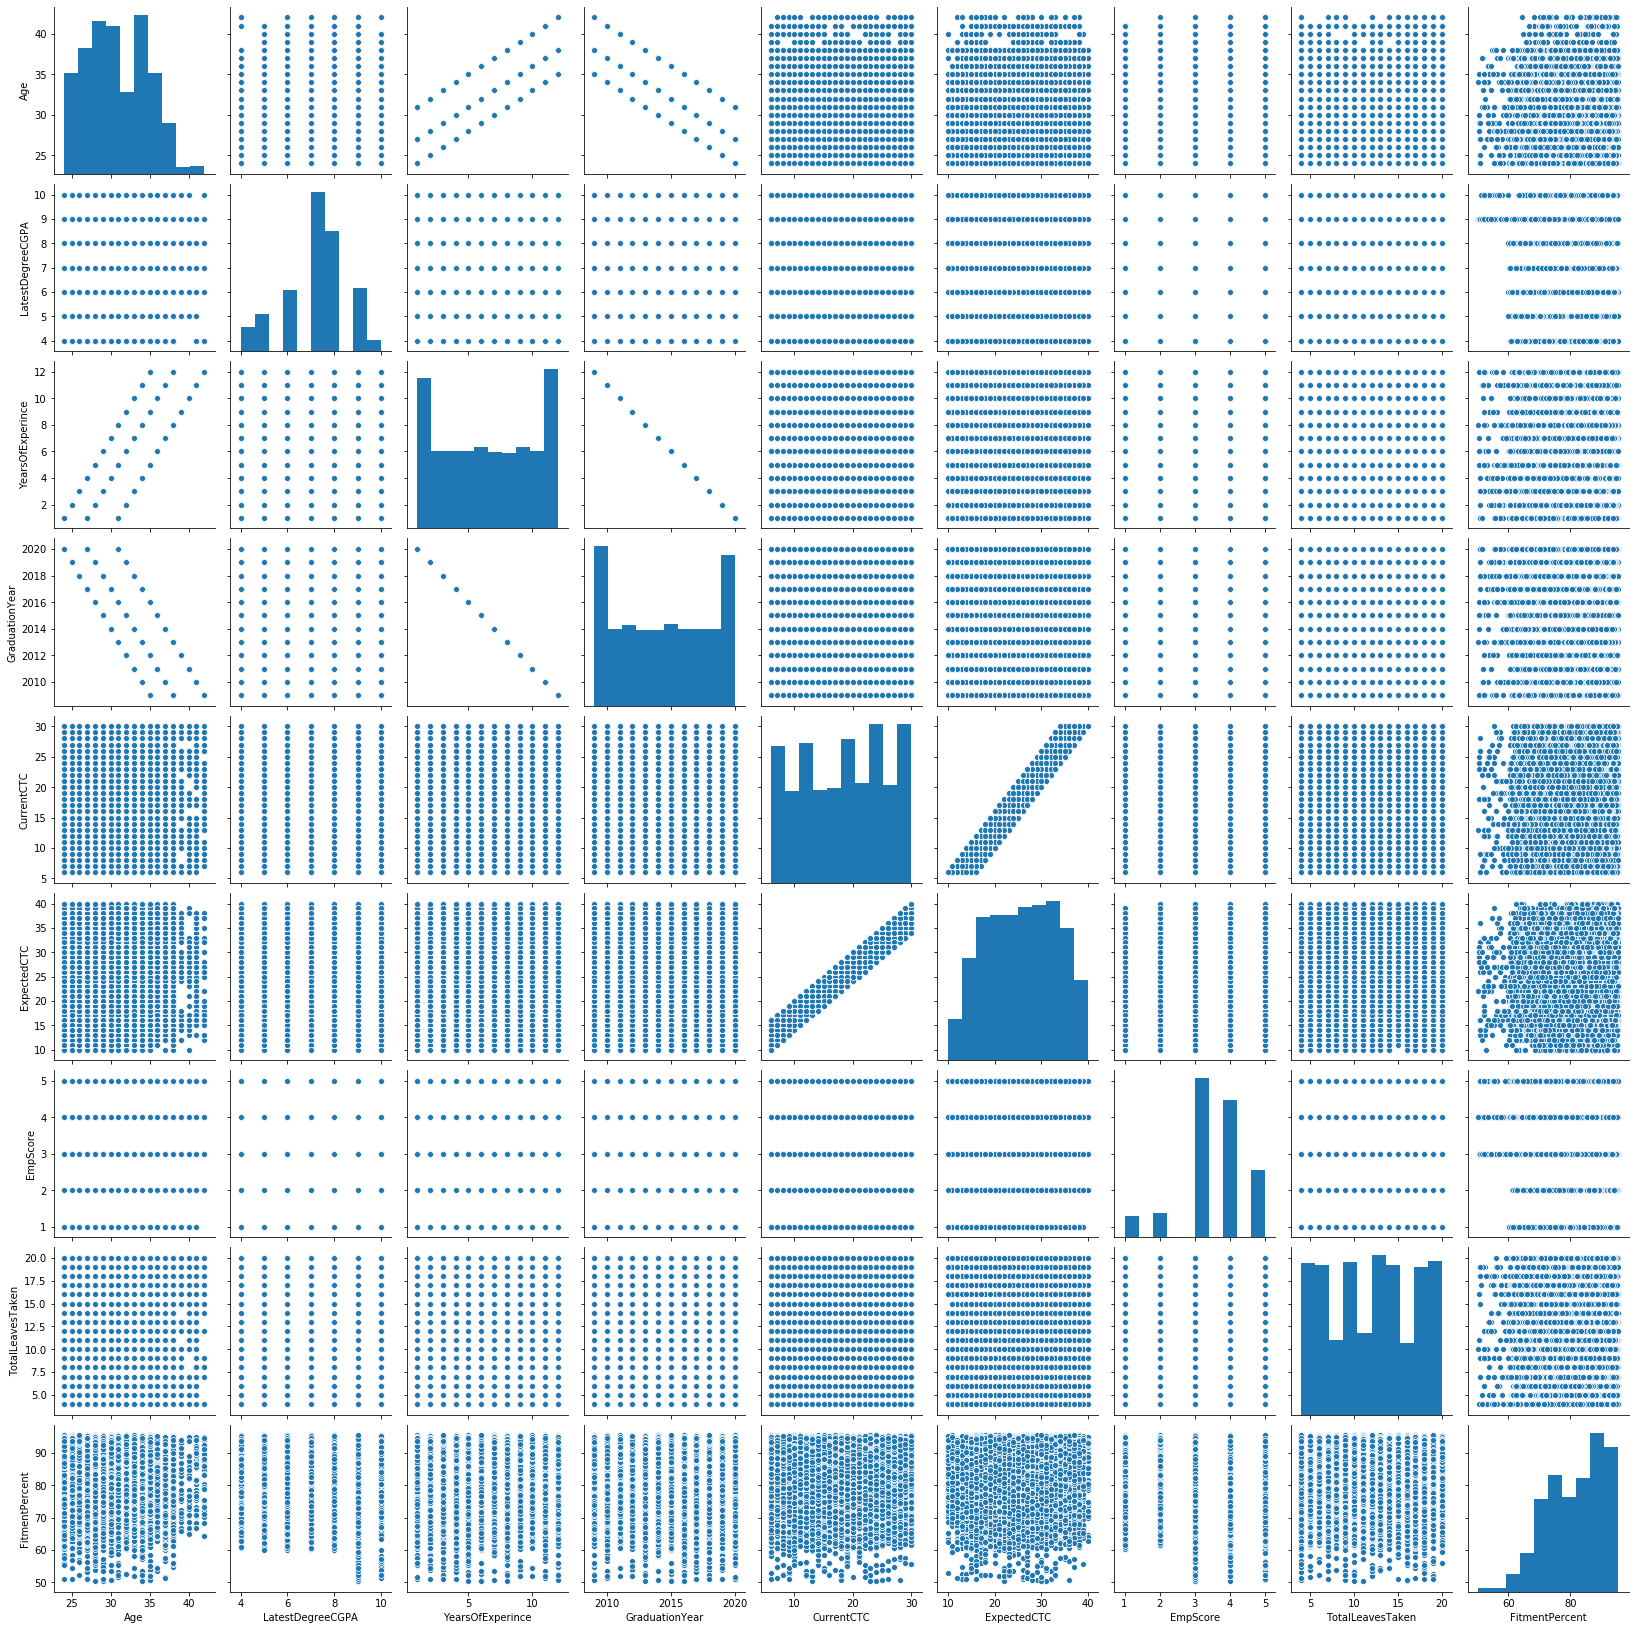

In [27]:
# Visulaizing linear relationship between each invidual feature.
sns.pairplot(X)

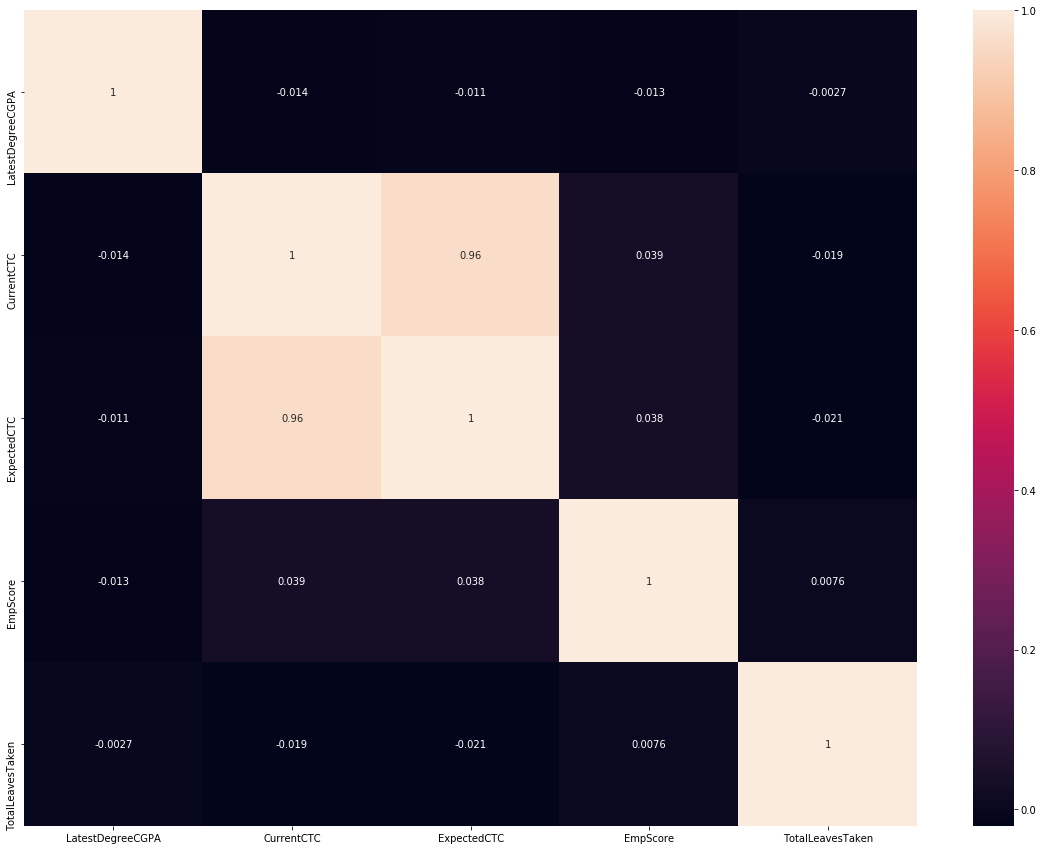

In [29]:
# Correlation between each individual variable.

corrMatrix = X.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [110]:
#Exploratory Data Analysis

X_summary = X.describe()
X_summary

,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent
count,10309.000000,10309.000000,10309.000000,10309.000000,10309.000000,10309.00000,10309.000000,10309.000000,10309.000000
mean,30.694539,7.151033,6.551654,2014.448346,18.345814,25.32331,3.503444,11.977107,81.706769
std,3.890167,1.372220,3.442805,3.442805,7.223054,7.50436,1.002283,4.888479,9.146580
min,24.000000,4.000000,1.000000,2009.000000,6.000000,10.00000,1.000000,4.000000,50.320000
25%,28.000000,6.000000,4.000000,2011.000000,12.000000,19.00000,3.000000,8.000000,74.460000
50%,31.000000,7.000000,7.000000,2014.000000,19.000000,26.00000,4.000000,12.000000,83.100000
75%,34.000000,8.000000,10.000000,2017.000000,25.000000,31.00000,4.000000,16.000000,89.530000
max,42.000000,10.000000,12.000000,2020.000000,30.000000,40.00000,5.000000,20.000000,95.500000


In [111]:
X_test_full_summary = X_test_full.describe()
X_test_full_summary

,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken
count,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000
mean,30.675472,7.111378,6.464608,2014.535392,18.019325,25.029846,3.388222,11.925214
std,3.934141,1.338240,3.458010,3.458010,7.154050,7.413648,1.057420,4.928806
min,24.000000,4.000000,1.000000,2009.000000,6.000000,10.000000,1.000000,4.000000
25%,28.000000,6.000000,3.000000,2012.000000,12.000000,19.000000,3.000000,8.000000
50%,31.000000,7.000000,6.000000,2015.000000,18.000000,25.000000,3.000000,12.000000
75%,34.000000,8.000000,9.000000,2018.000000,24.000000,31.000000,4.000000,16.000000
max,42.000000,10.000000,12.000000,2020.000000,30.000000,40.000000,5.000000,20.000000


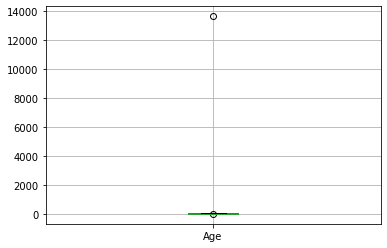

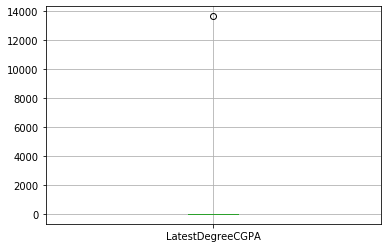

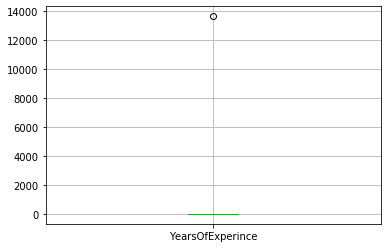

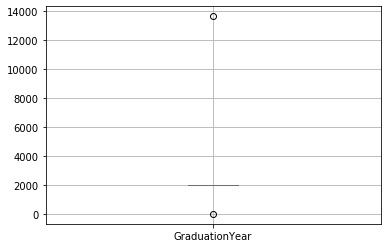

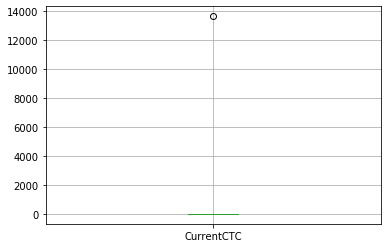

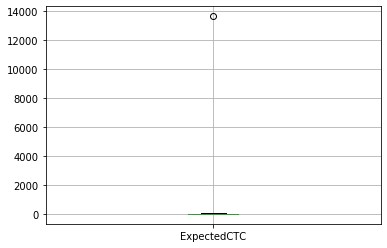

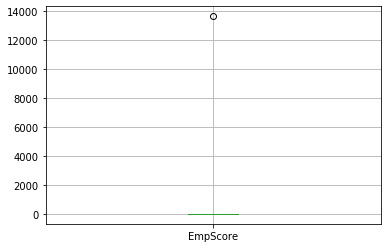

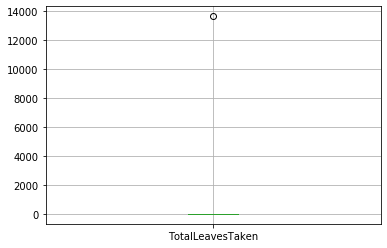

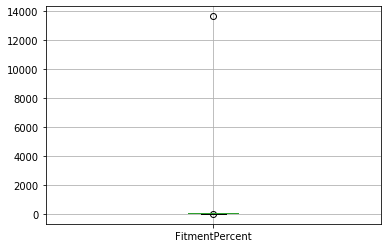

In [73]:
# Visualizing outliers

for column in X_summary:
    plt.figure()
    X_summary.boxplot([column])
    plt.show()

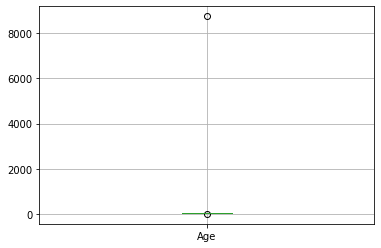

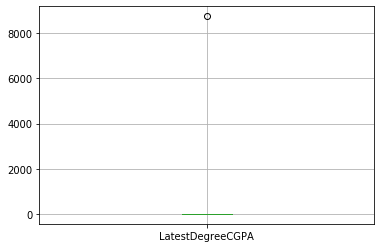

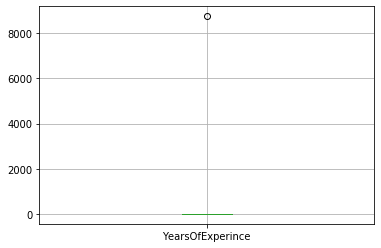

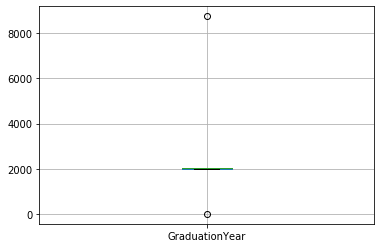

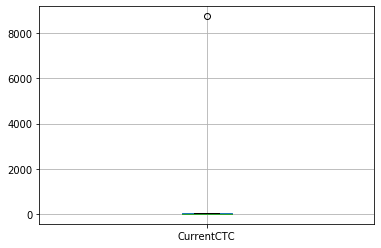

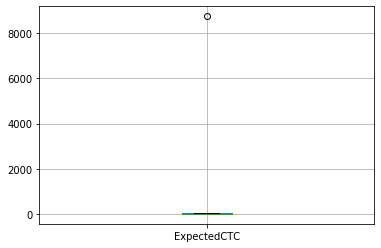

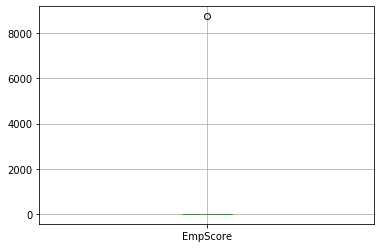

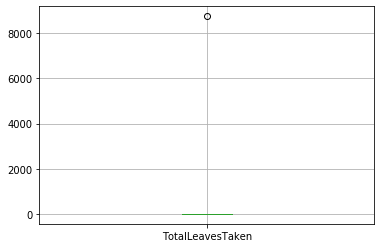

In [74]:
for column in X_test_full_summary:
    plt.figure()
    X_test_full_summary.boxplot([column])
    plt.show()

From the above vizualization of boxplot, it seems that there are outliers in both train and test datasets. So, I won't be treating the missing values. 

In [112]:
#Classifying the dependent and independent variable.

y = X['BiasInfluentialFactor']
z = X['FitmentPercent']
X.drop(['BiasInfluentialFactor', 'FitmentPercent', 'YearsOfExperince', 'GraduationYear', 'Age'], axis=1, inplace=True)

In [113]:
# Splitting the train data further to train the model.

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [114]:
# Converting the categorical values to numerical values.

low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 40 and 
                        X_train_full[cname].dtype == "object" and X_train_full[cname].nunique() > 2]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [115]:
# Define the model
my_model_1 = XGBClassifier(max_depth=6, n_estimators=100, learning_rate=0.1)

# Fit the model
my_model_1.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
# Splitting the train data further to train the model.

X_train_full, X_valid_full, z_train, z_valid = train_test_split(X, z, train_size=0.8, test_size=0.2, random_state=0)

In [117]:
# Converting the categorical values to numerical values.

low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 40 and 
                        X_train_full[cname].dtype == "object" and X_train_full[cname].nunique() > 2]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [118]:
# Define Model

my_model_2 = XGBRegressor(max_depth=5, n_estimators=75, learning_rate=0.08)

# Fit the model
my_model_2.fit(X_train, z_train)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=75, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [128]:
# Get predictions
predictions_1 = my_model_2.predict(X_valid)# Your code here
mae_1 = mean_absolute_error(predictions_1, z_valid)
print("Mean Absolute Error:" , mae_1)

Mean Absolute Error: 5.566167389271215


In [131]:
# Extracintg the predicted values to .csv file.

preds_test = my_model_1.predict(X_test)
pred1_test = my_model_2.predict(X_test)
output = pd.DataFrame({'EmpID': X_test_full.index,'BiasInfluentialFactor': preds_test, 'FitmentPercent':pred1_test})
output.to_csv('my_submission.csv', index=False)